# "Fun with Loot Boxes" Lab

> Author: Caroline Schmitt, Matt Brems

### Scenario:

You're an analyst for [Zynga](https://en.wikipedia.org/wiki/Zynga), a gaming studio working on an event for an MMO (massively multiplayer online) game. This event is going to include **loot boxes**.

<img src="https://vignette.wikia.nocookie.net/2007scape/images/0/06/Culinaromancer%27s_chest.png/revision/latest?cb=20180403231423" alt="drawing" width="150"/> 

A loot box is basically a treasure chest in a game. This loot box can be opened to reveal a variety of items: some items are very rare and valuable, other items are common and less valuable. (You may consult [the esteemed Wikipedia](https://en.wikipedia.org/wiki/Loot_box) for a more extensive definition.)

In our specific game, suppose that loot boxes can be obtained in one of two ways: 
- After every three hours of playing the game, a user will earn one loot box.
- If the user wishes to purchase a loot box, they may pay $1 (in real money!) for a loot box.

These loot boxes are very good for our business!
- If a player earns a loot box, it means they are spending lots of time on the game. This often leads to advertisement revenue, they may tell their friends to join the game, etc.
- If the player purchases a loot box, it means we've earned $1 from our customer.

Suppose each loot box is opened to reveal either:
- magical elixir (super rare, very valuable), or
- nothing.

Whether each loot box contains the elixir or nothing is **random**. Our boss wants some guidance on what sort of randomness to use on these loot boxes! 
- If the magical elixir is too rare, then users may not be motivated to try to get them, because they believe they'll never find the magical elixir.
- If the magical elixir is too common, then users may not be motivated to try to get them, because the game has so much of the magical elixir that it isn't worthwhile to try to get it.

However, our boss isn't a math-y type person! When explaining things to our boss, we need to explain the impact of our choices on the game as concretely as possible.

### Version 1
In our first version of the game, we'll say that loot boxes contain magical elixir 15% of the time and nothing 85% of the time.

#### 1. Our boss asks, "If a user buys 100 loot boxes, how many elixirs will they get?" How would you respond?

expected number of exilirs will be n boxes X P(getting magical exilirs) = 0.15 * 100 = 15 

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

#### 2. Our boss asks, "How many loot boxes does someone have to purchase in order to definitely get elixir?" How would you respond?

1 / 0.15 = 7 minimum boxes on average 

#### 3. Our boss asks, "If a user earns 100 loot boxes, what is the chance that a user gets more than 20 elixirs?" This is a bit more complicated, so let's break it down before answering.

#### 3a. Let's suppose my random variable $X$ counts up how many elixirs I observe out of my 100 loot boxes. Why is $X$ a discrete random variable?

X is a discrete random variable as it counts for discrete number of exilirs in a form of integers. 

#### 3b. Recall our discrete distributions: discrete uniform, Bernoulli, binomial, Poisson. Let's suppose my random variable $X$ counts up how many elixirs I observe out of my 100 loot boxes. What distribution is best suited for $X$? Why?
- Hint: It may help to consider getting the magical elixir a "success" and getting nothing a "failure." 

Binomial distribution. We need to compute the sum of the success in getting a lot from every draw

#### 3c. Our boss asks, "If a user earns 100 loot boxes, what is the chance that a user gets more than 20 elixirs?" Use the probability mass function to answer the boss' question.

In [9]:
loot_distn = stats.binom(n_boxes, p_elixer)

loot_distn

In [10]:
len(loot_distn.pmf(possible_elixers))

NameError: name 'possible_elixers' is not defined

Chance of user getting more than 20 elixers: 0.06631976463117652


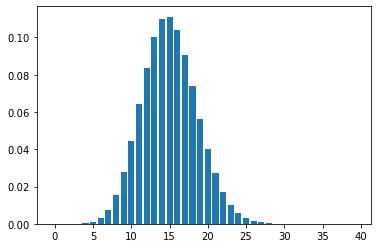

In [11]:
# Show your work; leave your answer in a comment.

p_elixer = .15
n_boxes = 100

loot_distn = stats.binom(n_boxes, p_elixer)

possible_elixers = list(range(0, 40))

plt.bar(possible_elixers,
        loot_distn.pmf(possible_elixers))

print(f'Chance of user getting more than 20 elixers: {sum(loot_distn.pmf(possible_elixers)[21:101])}')

#### 3d. Our boss asks, "If a user earns 100 loot boxes, what is the chance that a user gets more than 20 elixirs?" Use the cumulative distribution function to answer the boss' question.

Chance of user getting more than 20 elixers: 0.06631976581888166


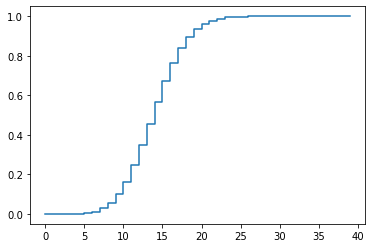

In [12]:
# Show your work; leave your answer in a comment.

p_elixer = .15
n_boxes = 100

loot_distn = stats.binom(n_boxes, p_elixer)

possible_elixers = list(range(0, 40))

plt.step(possible_elixers,
        loot_distn.cdf(possible_elixers))

print(f'Chance of user getting more than 20 elixers: {1-loot_distn.cdf(possible_elixers)[20]}')

In [13]:
sum(loot_distn.cdf(possible_elixers)[:21])/100

0.0608477529302372

#### 3e. Our boss asks, "If a user earns 100 loot boxes, what is the chance that a user gets more than 20 elixirs?" Answer your boss' question. *Remember that your boss is not a math-y person!*

the probability is very small 

#### 4. Your boss wants to know how many people purchased how many loot boxes last month. 
> For example, last month, 70% of users did not purchase any loot boxes. 10% of people purchased one loot box. 5% of people purchased two loot boxes... and so on.

#### 4a. Recall our discrete distributions: discrete uniform, Bernoulli, binomial, Poisson. Let's suppose my random variable $Y$ counts up how many loot boxes each person purchased through the game last month. What distribution is best suited for $Y$? Why?

Poisson distribution. A time span was given, which was over a month. 

#### 4b. Suppose that, on average, your customers purchased 2.7 loot boxes last month. In order for your revenue to be at least $500,000, at least how many users would you need on your platform? (Round your answer up to the nearest thousand.) 

In [76]:
# Show your work; leave your answer in a comment.
notroundedtotal = 500000/(2.7*1)
Totalpeople = round(500000/2.7*1)

Totalpeople

185185

#### 4c. Assume that your platform has the numer of users you mentioned in your last answer. Suppose that your platform calls anyone who purchases 5 or more loot boxes in a month a "high value user." How much money do you expect to have earned from "high value users?" How about "low value users?"

In [65]:
#loot boxes poisson distribution
purchase_stats = stats.poisson(2.7)
n_box = list(range(0,20))
purchase_prob = np.array([purchase_stats.pmf(box) for box in n_box])
purchase_prob

array([6.72055127e-02, 1.81454884e-01, 2.44964094e-01, 2.20467685e-01,
       1.48815687e-01, 8.03604710e-02, 3.61622120e-02, 1.39482818e-02,
       4.70754509e-03, 1.41226353e-03, 3.81311152e-04, 9.35945556e-05,
       2.10587750e-05, 4.37374558e-06, 8.43508076e-07, 1.51831454e-07,
       2.56215578e-08, 4.06930624e-09, 6.10395936e-10, 8.67404751e-11])

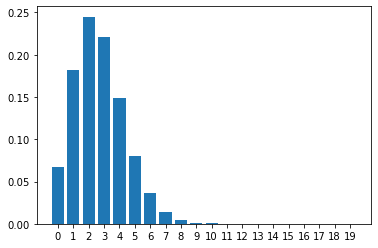

In [66]:
plt.bar(n_box, purchase_stats.pmf(n_box))
plt.xticks(n_box);

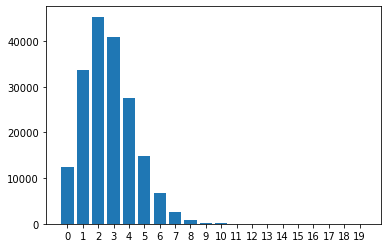

In [77]:
n_user_round = 185185

n_buyer = purchase_prob * notroundedtotal
plt.bar(n_box, n_buyer)
plt.xticks(n_box);

In [78]:
np.array(n_buyer)

array([1.24454653e+04, 3.36027564e+04, 4.53637211e+04, 4.08273490e+04,
       2.75584606e+04, 1.48815687e+04, 6.69670592e+03, 2.58301514e+03,
       8.71767610e+02, 2.61530283e+02, 7.06131764e+01, 1.73323251e+01,
       3.89977315e+00, 8.09952885e-01, 1.56205199e-01, 2.81169359e-02,
       4.74473293e-03, 7.53575230e-04, 1.13036284e-04, 1.60630509e-05])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

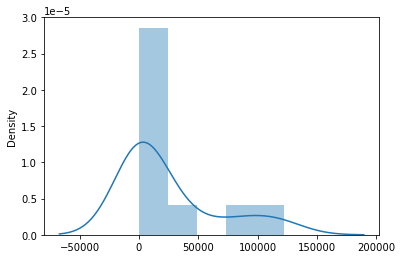

In [84]:
# Calculating the revenue from users who bought 0 to 20 boxes during the game last month
rev_stats = np.array(n_box * 1) * np.array(n_buyer)
sns.distplot(rev_stats,bins=5)

In [80]:
# Calculate the revenue from high value user (user with minimum purchase of 5 box) last month
hvu_min_purchase = 5
hvu_rev = sum(rev_stats[hvu_min_purchase:])
print(f'The revenue from High Value User is {round(hvu_rev)}')

The revenue from High Value User is 142954


In [81]:
# Calculate the revenue from low value user (user with purchase of less than 5 box) last month
lvu_rev = sum(rev_stats[:hvu_min_purchase])
print(f'The revenue from Low Value User is {round(lvu_rev)}')

The revenue from Low Value User is 357046


High value users would earn $25387.407449128867


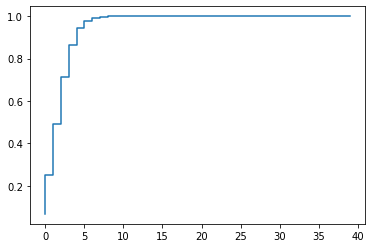

In [72]:
# high value users  
p_elixer = 2.7

exilir_distn = stats.poisson(p_elixer)

possible_loot = list(range(40))


plt.step(possible_loot,
        exilir_distn.cdf(possible_loot))
# 5 or more 

# probability x total numbers 

num_highvalueusers = (1-exilir_distn.cdf(possible_loot)[4])*185185

print(f'High value users would earn ${num_highvalueusers}')

In [73]:
# low value users 
num_highvalueusers = (1-exilir_distn.cdf(possible_loot)[4])*185185
total = 185185

low_users = total - num_highvalueusers

print(f'Low value users would earn ${round(low_users)}')

Low value users would earn $159798


#### 4d. Suppose that you want to summarize how many people purchased how many loot boxes last month for your boss. Since your boss isn't math-y, what are 2-4 summary numbers you might use to summarize this for your boss? (Your answers will vary here - use your judgment!)

on average people will likely to get 2 boxes over the month. 



#### 5. Your boss asks "How many loot boxes does it take before someone gets their first elixir?" Using `np.random.choice`, simulate how many loot boxes it takes somone to get their first elixir. 
- Start an empty list.
- Use control flow to have someone open loot boxes repeatedly.
- Once they open a loot box containing an elixir, record the number of loot boxes it took in the empty list.
- Repeat this process 100,000 times. 

This simulates how long it takes for someone to open a loot box containing elixir. Share the 5th, 25th, 50th, 75th, and 95th percentiles.

> You may find [this documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.choice.html)  and [this documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.percentile.html) helpful.

In [22]:
np.random.choice(loot,p=[0.15,0.85]) == 1

False

In [24]:
from collections import defaultdict
import numpy as np


loot = [0,1]

def getloot(n):
    
    #start with empty list
    emptylist = []
    
    # how many times need to do experiments
    for i in range(n):
        
        #initiate count 
        count = 1 
    
        #start with havent found exilir
        foundexilir = False
        
        while foundexilir == False:
            #if found then >> ==1 
            if np.random.choice(loot,p=[0.85,0.15]) == 1:
                #put in count into list
                emptylist.append(count)
                foundexilir = True
            else:
                #increase count 
                count += 1
            
    return emptylist    


arr = np.array(getloot(100))


print("5th percentile of arr : ", np.percentile(arr, 5))

print("25th percentile of arr : ", np.percentile(arr, 25))

print("50th percentile of arr : ", np.percentile(arr, 50))

print("75th percentile of arr : ", np.percentile(arr, 75))

print("95th percentile of arr : ", np.percentile(arr, 95))

5th percentile of arr :  1.0
25th percentile of arr :  2.0
50th percentile of arr :  5.0
75th percentile of arr :  9.25
95th percentile of arr :  19.14999999999999


**NOTE**: When your Jupyter notebook is open, double-click on this Markdown cell! You can delete this text and put your answer to the previous problem in here.

### Version 2

After a substantial update to the game, suppose every loot box can be opened to reveal *one of four different* items:
- magical elixir (occurs 1% of the time, most valuable)
- golden pendant (occurs 9% of the time, valuable)
- steel armor (occurs 30% of the time, semi-valuable)
- bronze coin (occurs 60% of the time, least valuable)

#### 6. Suppose you want repeat problem 5 above, but do that for the version 2 loot boxes so you can track how many loot boxes are needed to get each item? (e.g. You'd like to be able to say that on average it takes 10 trials to get a golden pendant, 3 trials to get steel armor, and so on.) What Python datatype is the best way to store this data? Why?

Dictionary

<AxesSubplot:>

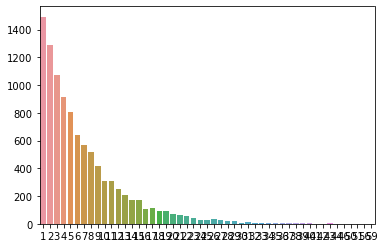

In [19]:
import pandas as pd
import seaborn as sns
boxes_dist = pd.DataFrame(getloot(10000))
val, cnt = np.unique(boxes_dist, return_counts=True)

sns.barplot(x = val,y = cnt,)

In [20]:
boxes_dist.mean()

0    6.6471
dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


0    6.6471
dtype: float64


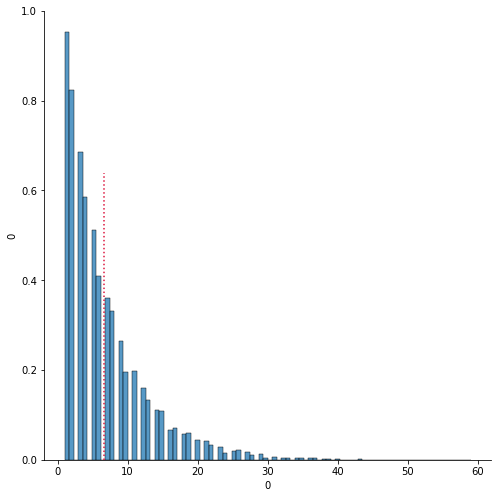

In [21]:
sns.pairplot(boxes_dist,size = 7)
mean = boxes_dist.mean()
print(mean)
plt.vlines(mean,0,1000,color='crimson', ls=':')

#### 7. Suppose you and your boss want to measure whether "Version 2" is better than "Version 1." What metrics do you think are important to measure? (Your answers will vary here - use your judgment!)

individual sum of the earnings from each 

